# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 8 апреля 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 8 апреля, -4 балла после 06:00 15 апреля, -6 баллов после 06:00 22 апреля  -8 баллов после 06:00 29 апреля.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



*** Что почитать по теории ***

Одна из лучших книг по ML $-$ "Pattern Recognition and Machine Learning" Bishop, Christopher. 

Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$ w_{new} = w_{old} - 2 \cdot \left ( \frac{1}{n} \sum_i^n (y_i - a_i) \cdot x_i + \frac{1}{C} \sum_j^D w_{oldj} \right ) $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

$$ w_{new} = w_{old} - \left ( \frac{1}{n} \sum_i^n (a_i - y_i) \cdot x_i + \frac{2}{C} \sum_j^D w_{oldj} \right ) $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией

***Ваше решение здесь***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [3]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    #
    if (shuffle == True):
        perm = np.random.permutation(X.shape[0])
    else:
        perm = np.array(X.shape[0])
    perm = perm.reshape(X.shape[0] // batch_size, batch_size)
    for i in range(0, perm.shape[0]):
        X_batch = X[perm[i]]
        y_batch = y[perm[i]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [3]:
#%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, c=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.c_recip = 1 / c
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        batch_size = X_batch.shape[0]
        if self.model_type == 'lin_reg':
            loss = self.predict(X_batch) - y_batch.reshape(-1, 1)
            loss = np.dot(loss.T, loss)
            loss = np.mean(loss, axis=0)
            loss += np.dot(self.weights.T, self.weights)[0] * self.c_recip
        if self.model_type == 'log_reg':
            prediction = self.predict(X_batch)
            loss = -(y_batch.reshape(-1, 1) * np.log(prediction) +
            (1 - y_batch.reshape(-1, 1)) * np.log(1 - prediction))
            loss = np.mean(loss, axis=0)
            loss += np.dot(self.weights.T, self.weights)[0] * self.c_recip
        return loss[0]

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        batch_size = X_batch.shape[0]
        if self.model_type == 'lin_reg':
            prediction = self.predict(X_batch)
            tmp = X_batch * (prediction - y_batch.reshape(-1, 1))
            loss_grad = 2 * np.mean(tmp, axis=0) + 2 * self.weights.T * self.c_recip
        if self.model_type == 'log_reg':
            prediction = self.predict(X_batch)
            tmp = X_batch * (prediction - y_batch.reshape(-1, 1))
            loss_grad = np.mean(tmp, axis=0) + 2 * self.weights.T * self.c_recip
        return loss_grad.reshape(-1, 1)

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad

    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        X = np.concatenate((X, np.ones(X.shape[0]).reshape(-1, 1)), axis=1)
        self.weights = np.random.rand(X.shape[1])
        self.weights = self.weights.reshape(-1, 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)
        if self.model_type == 'log_reg':
            y_hat = sigmoid(np.dot(X, self.weights)) 
        return y_hat


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [4]:
def plot_decision_boundary(clf):
    w = clf.weights.flatten()
    x = np.linspace(-4, 4)
    k = -w[1]/w[0]
    y = k * x
    plt.plot(x, y)

[[ 0.16074316]
 [-0.08055318]
 [ 0.25174005]]
[[ 0.14150492]
 [-0.09295401]
 [-0.01530272]]


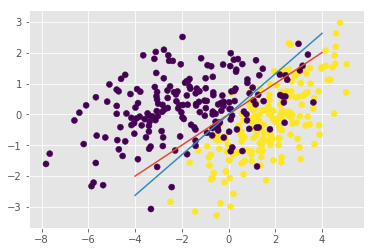

In [5]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

model = MySGDClassifier(batch_generator, model_type='lin_reg')
model.fit(X, y)
print(model.weights)
plot_decision_boundary(model)

model = MySGDClassifier(batch_generator, model_type='log_reg')
model.fit(X, y)
print(model.weights)
plot_decision_boundary(model)

X = (X - np.mean(X, axis=0))

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [6]:
from sklearn.datasets import make_classification

In [7]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

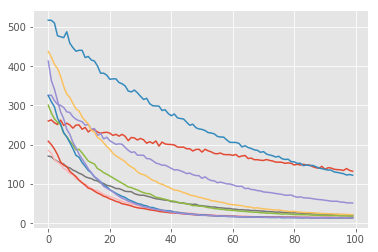

In [8]:
import seaborn as sns

N = 100


for alpha_k in range(100, 1001, 100):
    my_ = MySGDClassifier(batch_generator, alpha = 0.0000001 * alpha_k, max_epoch=10)
    my_.fit(X, y, 100)
    loss = np.array(my_.errors_log['loss'])
    loss = np.mean(loss.reshape(loss.shape[0] // N, N), axis=1)
    x = np.arange(loss.shape[0])
    sns.lineplot(x=x, y=loss)

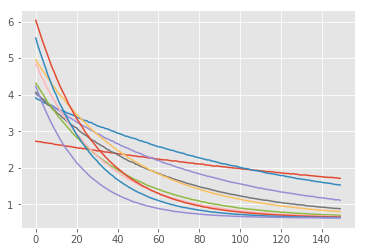

In [9]:
for alpha_k in range(100, 1001, 100):
    my_ = MySGDClassifier(batch_generator, alpha = 0.0000001 * alpha_k, max_epoch=15, model_type='log_reg')
    my_.fit(X, y, 100)
    loss = np.array(my_.errors_log['loss'])
    loss = np.mean(loss.reshape(loss.shape[0] // N, N), axis=1)
    x = np.arange(loss.shape[0])
    sns.lineplot(x=x, y=loss)

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

При малом шаге сходимость может так и не наступить (за данное кол-во эпох)

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [10]:
mean_lin = list()
for c in np.logspace(3, -3, 10): 
    model = MySGDClassifier(batch_generator, c=c, max_epoch=10, alpha=0.0001, model_type='lin_reg')
    model.fit(X, y, 100)
    mean_lin.append(np.mean(model.weights))
    
mean_log = list()
for c in np.logspace(3, -3, 10): 
    model = MySGDClassifier(batch_generator, c=c, max_epoch=10, alpha=0.0001, model_type='log_reg')
    model.fit(X, y, 100)
    mean_log.append(np.mean(model.weights))

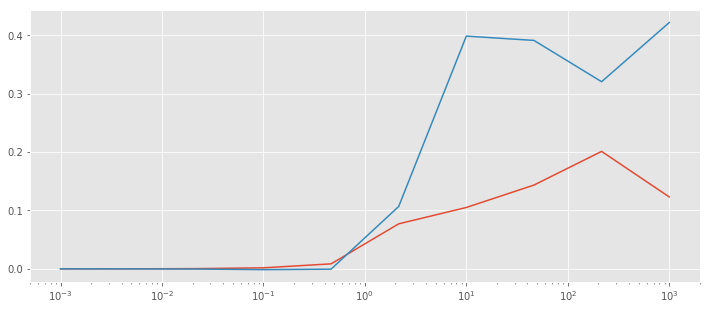

In [11]:
_, ax = plt.subplots(figsize=(12, 5))
ax.set(xscale='log')
sns.lineplot(x=np.logspace(3, -3, 10), y=mean_lin, ax=ax)
sns.lineplot(x=np.logspace(3, -3, 10), y=mean_log, ax=ax)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Более чем

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview-2.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [12]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [13]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [14]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [15]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler # внутри fit

In [16]:
model = MySGDClassifier(batch_generator, model_type='log_reg')
%time model.fit(X_train, y_train, 10)

CPU times: user 1.49 s, sys: 4.01 ms, total: 1.49 s
Wall time: 1.49 s


MySGDClassifier(alpha=0.01,
        batch_generator=<function batch_generator at 0x7fde76987488>,
        c=None, max_epoch=10, model_type='log_reg')

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [17]:
# нужно сохронять пропорциональное разбиение для каждого класса в groups_train

In [18]:
# будет использоваться для пропорционального разбиения
# внутри каждого класса. потом все классы склеятся
from sklearn.model_selection import train_test_split


local_args = np.argwhere(groups_train == 1).flatten()
X_per_class = X_train[local_args]
y_per_class = y_train[local_args]

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_per_class, y_per_class, test_size=0.1)

for class_lable in range(2, 130):
    local_args = np.argwhere(groups_train == class_lable).flatten()
    X_per_class = X_train[local_args]
    y_per_class = y_train[local_args]
    
    X_train_val_local, X_test_val_local, y_train_val_local, y_test_val_local = train_test_split(X_per_class, y_per_class, test_size=0.1)
    
    X_train_val = np.concatenate((X_train_val, X_train_val_local))
    X_test_val = np.concatenate((X_test_val, X_test_val_local))
    y_train_val = np.concatenate((y_train_val, y_train_val_local))
    y_test_val = np.concatenate((y_test_val, y_test_val_local))

print(X_train_val.shape, X_test_val.shape, y_train_val.shape, y_test_val.shape)
X_test_val = np.concatenate((X_test_val, np.ones(X_test_val.shape[0]).reshape(-1, 1)), axis=1)

(10460, 15) (1230, 15) (10460,) (1230,)


In [ ]:
log = {'lin_reg': [], 'log_reg': []}
for model_type in ['lin_reg', 'log_reg']:
    min_loss = 100
    for max in range(10, 21):
        for c in np.logspace(-1, 3, 10):
            for alpha_k in range(1, 101, 10):
                model = MySGDClassifier(batch_generator,
                                        model_type=model_type,
                                        max_epoch=max,
                                        alpha=0.0001 * alpha_k,
                                        c = c)
                model.fit(X_train_val, y_train_val, 10)
                if (np.mean(model.errors_log['loss'][-1000]) < min_loss):
                    min_loss = np.mean(model.errors_log['loss'][-1000])
                    log[model_type].append([model_type, max, 0.001 * alpha_k, c, min_loss])

In [28]:
log['log_reg'][-1:-10:-1]

[['log_reg', 14, 0.001, 16.68100537200059, 0.15487058186706876],
 ['log_reg', 10, 0.061, 1000.0, 0.17557784239002153],
 ['log_reg', 10, 0.041, 1000.0, 0.2124706929715765],
 ['log_reg', 10, 0.081, 129.15496650148827, 0.26697616720489925],
 ['log_reg', 10, 0.031, 46.41588833612777, 0.27586512615036374],
 ['log_reg', 10, 0.001, 46.41588833612777, 0.2888585325780955],
 ['log_reg', 10, 0.081, 16.68100537200059, 0.31583086848433184],
 ['log_reg', 10, 0.021, 5.994842503189409, 0.32296641384892427],
 ['log_reg', 10, 0.041, 2.1544346900318834, 0.4698545177823161]]

In [29]:
log['lin_reg'][-1:-10:-1]

[['lin_reg', 16, 0.07100000000000001, 0.1, 0.01214876510558934],
 ['lin_reg', 14, 0.091, 0.2782559402207124, 0.09050579126774463],
 ['lin_reg', 11, 0.021, 0.1, 0.1131639530798903],
 ['lin_reg', 10, 0.061, 46.41588833612777, 0.2711483589522951],
 ['lin_reg', 10, 0.091, 2.1544346900318834, 0.36311819778758975],
 ['lin_reg', 10, 0.081, 0.1, 0.7660588496051512],
 ['lin_reg', 10, 0.011, 0.1, 1.176461580969771],
 ['lin_reg', 10, 0.001, 0.1, 1.6621017534547031]]

In [31]:
model = MySGDClassifier(batch_generator,
                        model_type='log_reg',
                        max_epoch=10,
                        alpha=0.007,
                        c=1000)
model.fit(X_train_val, y_train_val, 10)

MySGDClassifier(alpha=0.007,
        batch_generator=<function batch_generator at 0x7fde76987488>,
        c=None, max_epoch=10, model_type='log_reg')

0.8095521885521886


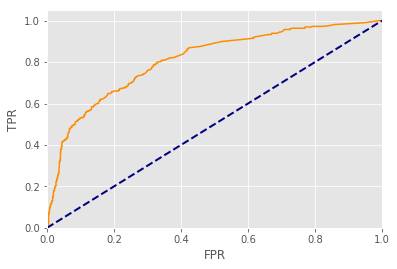

In [32]:
# захотел проверить что какая-то предсказательная способнасть 
# действительно имеется и дальнейший перебор границы для f1_score будет разумен
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, thresholds = roc_curve(y_test_val, model.predict(X_test_val))
print(roc_auc_score(y_test_val, model.predict(X_test_val)))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [33]:
scores = [[], []]
for k in range(1, 500, 1):
    scores[0].append(f1_score(y_test_val, model.predict(X_test_val) > (0.5 + 0.001 * k)))
    scores[1].append(0.5 + 0.001 * k)
print(np.max(scores[0]))
best_for_f1 = scores[1][np.argmax(scores[0])]
print(best_for_f1)

0.6038291605301915
0.8500000000000001


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

In [34]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [35]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)
X_test = np.concatenate((X_test, np.ones(X_test.shape[0]).reshape(-1, 1)), axis=1)

(16627, 15) (16627,)


In [36]:
df = pd.DataFrame({
    'pair_id': test_data['pair_id'],
    'target': ((model.predict(X_test) > best_for_f1).flatten() + 0)
})
df.to_csv('zenin_submission.csv', index=False)

# Контрольные вопросы
Постарайтесь максимально развернуто и честно ответить на вопросы. Они охватывают тему линейных моделей и скорее нужны преподавателям, чтобы понимать, что именно Вы усвоили плохо. Надеюсь, они подскажут, что именно в теме Вы не понимаете или наоборот порадают, что Вы все знаете ^_^

* Опишите основные, на Ваш взгляд,  отличия логистической регрессии от линейной регрессии. Почему, на ваш взгляд, задачу классификации решают логистической, а не линейной регрессией?

***Ваше ответ здесь:*** Отличие в ответе модели (ну из-за этого в ходе ее тренировки, т.к. она постоянно дает ответы). На выходе логистической регрессии у нас есть предсказания, по которым мы можем адекватно судить, с какой "вероятности" "засчитывать" ответ модели, а в линейной предсказание "0.98" ничего не говорит о принадлежности объекта к какому-то классу.

* Как Вы думаете, для каких типов задач (объем данных, число признаков, типы признаков) стоит отдавать предпочтение линейным моделям?

***Ваше ответ здесь:*** От объема данных и числа признаков зависит время обучения, если оно не так критично, то отступать от идеи линейных моделей сразу не стоит, можно отдать предпочтение в их пользу, если изначально это планировалось. По признакам в данных разумеется должно быть хотя бы какое-то подобие линейной зависимости, иначе использование таких моделей нецелесообразно.

* Пусть на обучении мы имеем выборку размера $N$, число признаков $D$. Чему равна алгоритмическая сложность одного шага градиентного спуска? Cтохастического градиентного спуска?  Сложность предсказания на одном объекте?

***Ваше ответ здесь:*** 

Сложность предсказания на одном объекте: $\mathcal{O}(D)$.

Сложность шага стохастического градиентного спуска: $\mathcal{O}(D)$ или $\mathcal{O}(D \cdot s)$, где $s$-размер мини-батча.

Сложность шага градиентного спуска: $\mathcal{O}(D \cdot N)$.

* В чем преимущества стохастического градиентного спуска (в том числе мини-батч) над обычным градиентным спуском? В чем его недостатки? Рассмотрите несколько аспектов $-$ скорость сходимости, необходимость загрузки всех данных в оперативную память, сложность вычисления одного шага.

***Ваше ответ здесь:*** Шаг может быть сделан не идеально по направлению наискорейшего убывания, но в сравнении с обычным спуском можно успеть сделать больше таких шагов даже за меньшее время, обеспечив тем самым более быструю сходимость. В оперативную память не обязательно загружать весь датасет, можно брать батчи комфортного размера.

* Как Вы думаете, при обучении линейной модели с помощью SGD, ошибку на новом объекте стоит считать до итерации спуска на этом объекте или после? Почему Вы так думаете? Возможно, Вам будет интересно ознакомиться с http://hunch.net/~jl/projects/prediction_bounds/thesis/mathml/thesisse44.xml

***Ваше ответ здесь:*** Вообще нам больше интересна разница между ошибками до и после шага, потому что по ней можно ориентироваться и говорить о наступлении сходимости (или расходимости).
Если считать после, то мы получим лоссы для всех шагов, а если до, то мы не узнаем лосс на самом последнем шаге, поэтому думаю что считать после - лучше.

* Как Вы думаете, во времена такого бума нейронных сетей, остаются ли популярными линейные модели, или это уже пережиток прошлого? Почему Вы так думаете?

***Ваше ответ здесь:*** В нейронных сетях сложновато интерпретировать то, как модель принимает решение, смотря на то что сформировалось внутри нее после обучения, а данные с линейных моделей поддаются интерпретации, поэтому в тех доменах где это критично, можно отдать предпочтение линейным моделям.

Нейронные сети могут работать с нелинейными зависимостями крайне успешно, но если известно, что данные линейны, то имеет смысл также отдать предпочтение в сторону линейных моделей, т.к. они более простые, а значит на таких данных меньше подвержены переобучению.

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь:*** оптимизация вычисления смещения путем добавления фиктивных единиц в фичи и дополнительного веса. Сделал это ориентируясь на примеры, которые сам находил на просторах интернета (ods).

Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

***ВАШ ОТЗЫВ ЗДЕСЬ:*** Ни в коем случае не минус этой домашки и курса, просто комментарий. В процессе поиска дополнителной информации для понимания находил примеры в виде картинок (в лекции по линейным моделям они были, но не в таком количесве, в котором понадобились мне чтобы понять). Теоретическую часть сложно делать без развитого курса функций многих переменных, теории вероятностей и статистики.

В целом все понравилось